In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras

# Load MNIST data

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape[0], X_test.shape[0] # we have 60k training instances & 10k test instances

(60000, 10000)

In [4]:
X_train_full[0].min(), X_train_full[0].max() # the individual pixel values range from 0 to 255; we'll want to scale these to between 0 & 1

(0, 255)

## Create validation set & scale pixel values

In [5]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0

In [6]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
X_test = X_test/255.0

In [8]:
y_valid # labels are simple integer values

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

In [9]:
y_train = y_train*1.0
y_valid = y_valid*1.0
y_test = y_test*1.0

We now have the following datasets:

> X_train, y_train
    
> X_valid, y_valid
    
> X_test, y_test

# Build model

In [10]:
model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(300, activation='softmax'),
    ]
)

In [11]:
model.compile(
#     loss= 'SparseCategoricalCrossentropy',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # loss when labels are integers
    optimizer='sgd',
    metrics=['accuracy']
)

In [12]:
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10,
    restore_best_weights=True
)

In [13]:
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stopping_cb]
)

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7745 - accuracy: 0.8199 - val_loss: 0.3351 - val_accuracy: 0.9076
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3137 - accuracy: 0.9097 - val_loss: 0.2672 - val_accuracy: 0.9252
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2594 - accuracy: 0.9256 - val_loss: 0.2209 - val_accuracy: 0.9364
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2234 - accuracy: 0.9358 - val_loss: 0.2005 - val_accuracy: 0.9420
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1957 - accuracy: 0.9442 - val_loss: 0.1751 - val_accuracy: 0.9516
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1732 - accuracy: 0.9505 - val_loss: 0.1649 - val_accuracy: 0.9538
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1552 - accuracy: 0.9553 - val_loss: 0.1502 - val_accuracy:

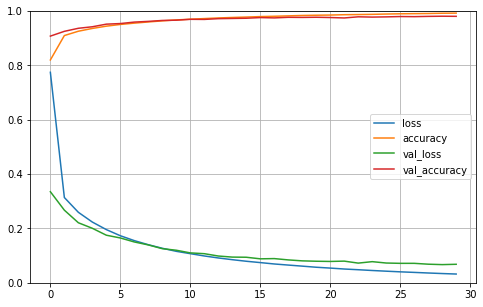

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [15]:
model.evaluate(X_test, y_test);

313/313 [==============================] - 0s 1ms/step - loss: 0.0720 - accuracy: 0.9775


In [16]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 

In [22]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([7, 2, 1])